In [55]:
%matplotlib inline
%run funciones.py

# state_0 = array([0., 0., 0.,   # Posicion   x,  y,  z
#                  0., 0., 0.,   # velocidad dx, dy, dz
#                  0., 0., 0.,   # Angulo    phi, theta, psi
#                  0., 0., 0.])  # Velocidad angular  dphi, dtheta, dpsi


state_0 = array([0., 0., 1.,   # Posicion   x,  y,  z
                 0., 0., 0.,   # velocidad dx, dy, dz
                 0, 0., pi / 15.,   # Angulo    phi, theta, psi
                 0., 0., 0.])  # Velocidad angular  dphi, dtheta, dpsi

target = array([0., 0., 0.,
                0., 0., 0.,
                0., 0., 0.,
                0., 0., 0.])

def drone(state, t):
    
    x = state[0:3]
    y = state[3:6]
    z = state[6:9]
    w = state[9:12]
    
    dx = y
    dy = array([0, 0, -g]) - (Ax / m) * y + (T(omega2(state, target, t)) / m) * array([cos(z[2]) * sin(z[1]) * cos(z[0]) + sin(z[2]) * sin(z[0]),
                                                                                       sin(z[2]) * sin(z[1]) * cos(z[0]) - cos(z[2]) * sin(z[0]),
                                                                                       cos(z[1]) * cos(z[0])])

    dz = w
    dw = J_inv(state).dot(Tau(omega2(state, target, t)) - C(state).dot(w))  
    
    sol = array([dx, dy, dz, dw])
    return sol.flatten()

t = arange(0, 4., 0.001)
sol = odeint(drone, state_0, t)

om = zeros([len(t), 4])
for (ind, ti) in enumerate(t):
    om[ind] = sqrt(omega2(sol[ind], target, ti))

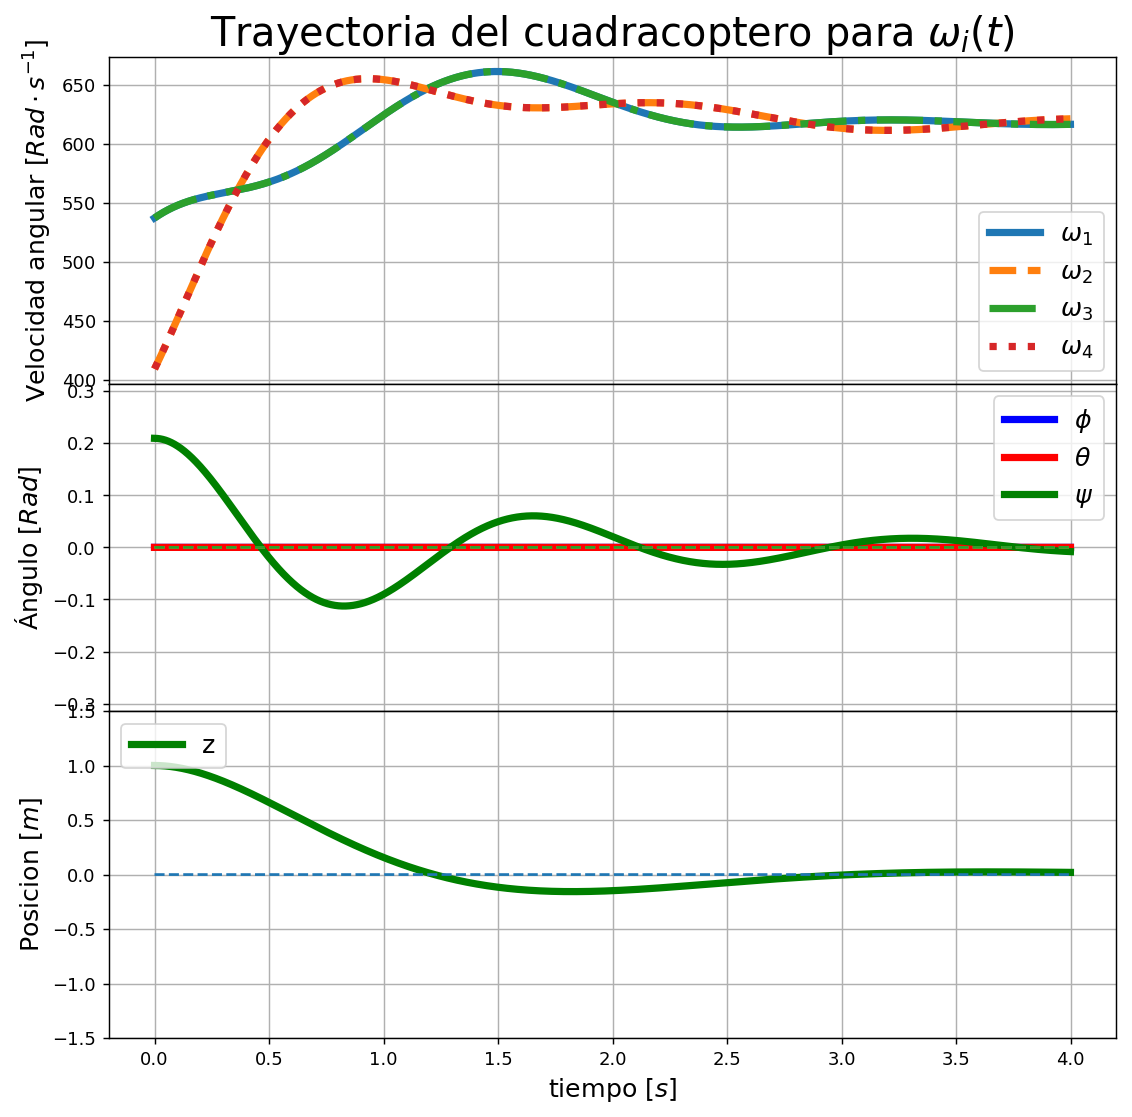

In [56]:
x = (sol[:,0] + sol[:,1]) * sqrt(2)
y = (sol[:,0] - sol[:,1]) * sqrt(2)

fig = figure(figsize=[10, 10], dpi = 130)
ax = fig.add_subplot(311)
ax.grid()
bx = fig.add_subplot(312, sharex=ax)
bx.grid()
cx = fig.add_subplot(313, sharex=ax)
cx.grid()

ax.set_title(r"Trayectoria del cuadracoptero para $\omega_i(t)$", fontsize = 22)
ax.plot(t, om[:,0], '-', label = r'$\omega_1$', linewidth = 4)
ax.plot(t, om[:,1], '--', label = r'$\omega_2$', linewidth = 4)
ax.plot(t, om[:,2], '-.', label = r'$\omega_3$', linewidth = 4)
ax.plot(t, om[:,3], ':', label = r'$\omega_4$', linewidth = 4)
# ax.set_ylim(1520, 1540)
ax.set_ylabel(u"Velocidad angular $[Rad \cdot s^{-1}]$",fontsize = 14)

ax.legend(loc = 4, fontsize = 14)

bx.plot(t, sol[:,6] * 5,'b', label = r'$\phi$', linewidth = 4)
bx.plot(t, sol[:,7] * 5,'r', label = r'$\theta$', linewidth = 4)
bx.plot(t, sol[:,8],'g', label = r'$\psi$', linewidth = 4)
# bx.set_yticks(arange(-0.08, 0.1, 0.04))
# bx.set_yticklabels([r"$\frac{\pi}{21}$", "$0$", r"$\frac{\pi}{21}$"])

bx.plot(t, target[6] * ones_like(t), '--')
bx.plot(t, target[7] * ones_like(t), '--')
bx.plot(t, target[8] * ones_like(t), '--')
bx.set_ylim(-pi / 10., pi / 10.)
bx.set_ylabel(u"Ángulo $[Rad]$",fontsize = 14)

bx.legend(loc = 1, fontsize = 14)

# cx.plot(t, x,'b', label = 'x', linewidth = 4)
# cx.plot(t, y,'r', label = 'y', linewidth = 4)
cx.plot(t, sol[:,2],'g', label = 'z', linewidth = 4)

# cx.plot(t, target[0] * ones_like(t), '--')
# cx.plot(t, target[1] * ones_like(t), '--')
cx.plot(t, target[2] * ones_like(t), '--')
cx.set_ylim(-1.5, 1.5)
cx.set_xlabel("tiempo $[s]$",fontsize = 14)
cx.set_ylabel("Posicion $[m]$",fontsize = 14)
cx.legend(loc = 2, fontsize = 14)

fig.subplots_adjust(hspace=0)
fig.savefig('simu.png')
show()